In [1]:
%matplotlib inline
import numpy as np
import os
from matplotlib import pyplot as plt
import pickle

import torch

In [5]:
basepath = "/home/mccrinbc/"
foldernames = [ #'results_TBI_model-End-2020-10-05-11',
                #'results_TBI_model-End-2020-10-21-18',
                #'results_TBI_model-End-2020-10-22-16',
                #'results_TBI_model-End-2020-10-22-17',
                #'results_TBI_model-End-2020-10-22-18', 
                #'results_TBI_model-End-2020-10-22-19',
                #'results_TBI_model-End-2020-10-22-20',
                #'results_TBI_model-End-2020-10-23-18-41',
                #'results_TBI_model-End-2020-10-23-19-10',
                #'results_TBI_model-End-2020-10-23-19-32',
                #'results_TBI_model-End-2020-10-23-20-14'
                #'results_TBI_model-End-2020-10-26-9-50',
                #'results_TBI_model-End-2020-10-26-10-31',
                #'results_TBI_model-End-2020-10-26-11-51',
                #'results_TBI_model-End-2020-10-26-12-35',
                #'results_TBI_model-End-2020-10-27-15-59',
                #'results_TBI_model-End-2020-10-28-16-57',
                #'results_TBI_model-End-2020-10-28-17-16',
                #'results_TBI_model-End-2020-10-30-11-52',
                #'results_TBI_model-End-2020-10-30-12-19',
                #'results_TBI_model-End-2020-10-30-12-46',
                #'results_TBI_model-End-2020-10-30-13-13',
                #'results_TBI_model-End-2020-10-30-14-20',
                #'results_TBI_model-End-2020-10-30-14-47',
                #'results_TBI_model-End-2020-10-30-15-14',
                #'results_TBI_model-End-2020-11-02-11-15',
                #'results_TBI_model-End-2020-11-02-11-41',
                #'results_TBI_model-End-2020-11-02-12-14',
                #'results_TBI_model-End-2020-11-02-13-3',
                #'results_TBI_model-End-2020-11-02-13-26',
                #'results_TBI_model-End-2020-11-03-11-37',
                #'results_TBI_model-End-2020-11-03-12-1',
                #'results_TBI_model-End-2020-11-03-13-57',
                #'results_TBI_model-End-2020-11-03-14-18',
                #'results_TBI_model-End-2020-11-03-15-57',
                #'results_TBI_model-End-2020-11-03-16-13',
                #'results_TBI_model-End-2020-11-04-14-18',
    
                #'results_TBI_model-End-2020-11-04-14-34',
                #'results_TBI_model-End-2020-11-04-14-49',
                #'results_TBI_model-End-2020-11-04-15-5',
                #'results_TBI_model-End-2020-11-04-15-20',
                #'results_TBI_model-End-2020-11-04-15-36',
                #'results_TBI_model-End-2020-11-04-15-51',
                'results_TBI_model-End-2020-11-04-16-6',
    
                'results_TBI_model-End-2020-11-05-10-42',
                'results_TBI_model-End-2020-11-05-11-18',
                'results_TBI_model-End-2020-11-05-11-38'
               ]




In [6]:
data = {}
for ii, folder in enumerate(foldernames):
    testDataPath = os.path.join(basepath, folder,"test_results.pkl")
    
    with open(testDataPath,'rb') as f:  
        ENCODER, EPCOHS, lr_final, TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice, BCE = pickle.load(f)
    
    data[ii] = [ENCODER, EPCOHS, lr_final, TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice, BCE]
    #data[ii] = [TPR_list, FPR_list, precision, thresholds, best_acc_thresh, IoUs, Dice]

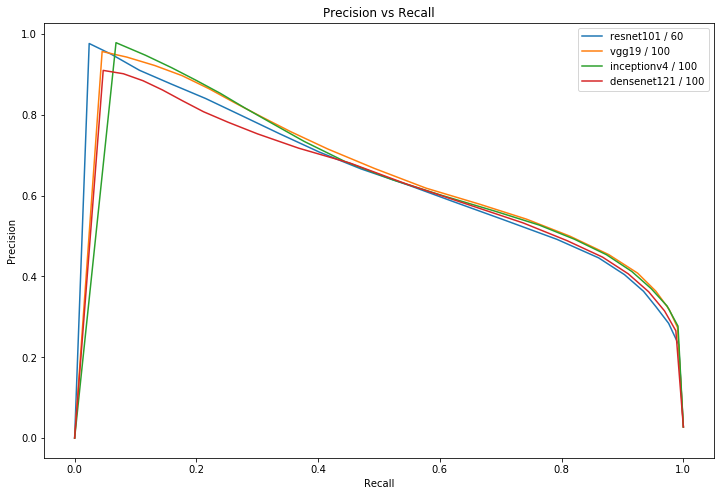

In [7]:
#Precision vs Recall. Caluclating F1 Score. 
plt.figure(1,figsize=(12,8))
thresh_index = 15
legend = []
for ii in range(len(data)):  
    plt.plot(data[ii][3], data[ii][5])
    #plt.plot(data[ii][3][thresh_index],data[ii][5][thresh_index],'ro')
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))

plt.title('Precision vs Recall')#. Thresh = ' + str(data[0][6][thresh_index]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(legend)

<ipython-input-8-6f5f94e36271>:7: RuntimeWarning: invalid value encountered in true_divide
  F1 = (2*data[ii][3]*data[ii][5]) / (data[ii][3] + data[ii][5])


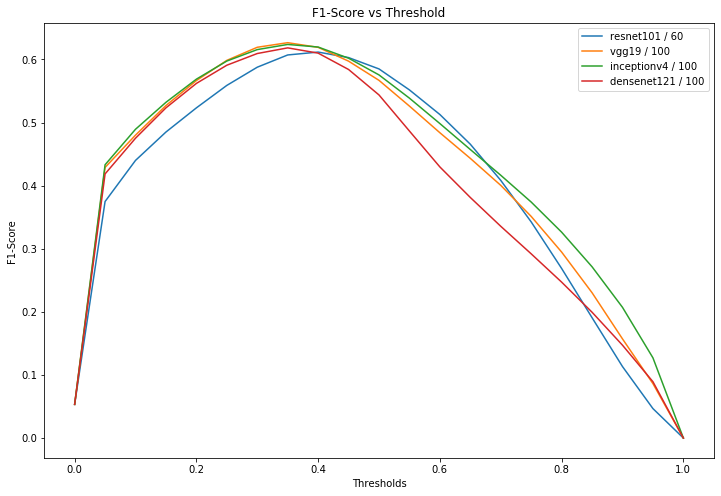

In [8]:
#Plotting the Harmoic Mean of the Precision and Recall (F1-Score)
#Precision vs Recall. Caluclating F1 Score. Looks identical to Dice. 
plt.figure(1,figsize=(12,8))
thresh_index = 15
legend = []
for ii in range(len(data)): 
    F1 = (2*data[ii][3]*data[ii][5]) / (data[ii][3] + data[ii][5])
    F1 = np.nan_to_num(F1, nan = 0)
    plt.plot(data[ii][6], F1)
    #plt.plot(data[ii][3][thresh_index],data[ii][5][thresh_index],'ro')
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))

plt.title('F1-Score vs Threshold')#. Thresh = ' + str(data[0][6][thresh_index]))
plt.xlabel('Thresholds')
plt.ylabel('F1-Score')
plt.legend(legend)


In [27]:
data

{0: ['resnet101',
  60,
  0.0001,
  array([1.        , 0.98766833, 0.95717389, 0.91444743, 0.85636131,
         0.79643286, 0.73173119, 0.65386227, 0.55971637, 0.45463396,
         0.37309314, 0.31943784, 0.26852434, 0.22263447, 0.18146672,
         0.14322985, 0.10776798, 0.07571483, 0.04779354, 0.02037051,
         0.        ]),
  array([1.00000000e+00, 8.03081689e-02, 5.98522629e-02, 4.64614510e-02,
         3.61419216e-02, 2.81439355e-02, 2.16563667e-02, 1.58141148e-02,
         1.06240885e-02, 6.53830471e-03, 4.29448444e-03, 3.05473039e-03,
         2.09146876e-03, 1.36533430e-03, 8.45597617e-04, 4.94188837e-04,
         2.65265772e-04, 1.10395468e-04, 2.78507471e-05, 2.30290415e-06,
         0.00000000e+00]),
  array([0.02739233, 0.25726316, 0.31053656, 0.35663007, 0.4002367 ,
         0.44351541, 0.4876015 , 0.5379956 , 0.59738677, 0.66197251,
         0.70987534, 0.74652303, 0.78336029, 0.82118756, 0.85803521,
         0.89086141, 0.9196267 , 0.95077812, 0.97972867, 0.996002  ,

In [9]:
num = 1
prec_recall_thresh = abs(data[num][5] - data[num][3])[0:-2]
optimal_index = np.where(prec_recall_thresh == np.min(prec_recall_thresh))
optimal_prec_rec_thresh = data[num][6][optimal_index][0]
print(optimal_prec_rec_thresh)

0.45


Optimal Threshold:  0.45
Test Loss at Thresh:  0.5971578401199013


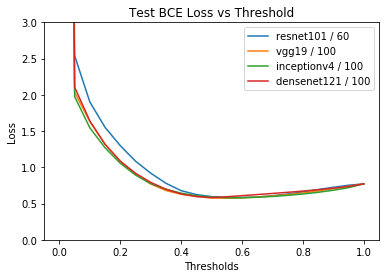

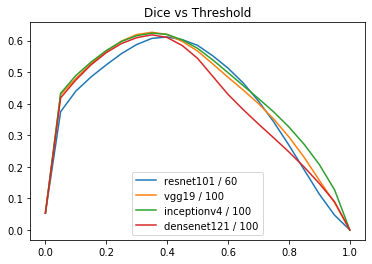

In [10]:
#Test Weighted BCE Loss is the mean of the set of mean losses on each batch. 
#example: 20 batches, 20 mean losses, average losses into single number for 1 threshold, do for x thresholds. 
plt.figure(0)
legend = []
for ii in range(len(data)):
    plt.plot(data[ii][6],data[ii][-1])
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
plt.title('Test BCE Loss vs Threshold')
plt.xlabel('Thresholds')
plt.ylabel('Loss')
plt.ylim([0,3])
plt.legend(legend)

plt.figure(2)
plt.title('Dice vs Threshold')
legend = []
for ii in range(len(data)):
    plt.plot(data[ii][6],data[ii][-2])
    legend.append(data[ii][0] + ' / ' + str(data[ii][1]))
    
plt.legend(legend)

test_loss_at_optimal_threshold = data[ii][-1][np.where(data[ii][6] == optimal_prec_rec_thresh)[0][0]]
print('Optimal Threshold: ', optimal_prec_rec_thresh)
print('Test Loss at Thresh: ', test_loss_at_optimal_threshold)

In [30]:
ii

6

In [107]:
import torch

In [117]:
a = torch.rand(3,1,3,3)
b = torch.rand(3,1,3,3)

In [118]:
a = a > 0.3
b = b > 0.3

In [119]:
a.dtype

torch.bool

In [121]:
a.shape

torch.Size([3, 1, 3, 3])

In [122]:
predictions = a.float()
labels = b.float()

In [123]:
print(a)
print(b)

tensor([[[[False,  True, False],
          [ True,  True, False],
          [False,  True,  True]]],


        [[[ True,  True,  True],
          [ True,  True,  True],
          [ True,  True, False]]],


        [[[ True,  True,  True],
          [ True,  True,  True],
          [False,  True, False]]]])
tensor([[[[ True,  True, False],
          [False,  True, False],
          [ True,  True,  True]]],


        [[[ True,  True,  True],
          [ True, False,  True],
          [ True, False,  True]]],


        [[[ True, False, False],
          [ True,  True,  True],
          [ True, False, False]]]])


In [129]:
def Weights(labels, device):
    #expects an [batch_size,c,n,n] input 
    
    weights = torch.rand(labels.shape) #create a random tensor of weight values. 
    weights = weights.to(device) #put everything onto the GPU. 
    
    for batch_num in range(0,labels.shape[0]):
        num_ones = torch.sum(labels[batch_num,0,:,:]);
        resolution = labels.shape[2] * labels.shape[3]
        num_zeros = resolution - num_ones 
        
        #https://discuss.pytorch.org/t/how-to-apply-a-weighted-bce-loss-to-an-imbalanced-dataset-what-will-the-weight-tensor-contain/56823/2
        #Weight for the positive class
        pos_weight = num_zeros / resolution #should be close to 1.
        neg_weight = 1 - pos_weight 
        
        #create 1s tensor, put to GPU.
        ones = torch.ones(labels.shape[2],labels.shape[3])
        ones = ones.to(device)
        
        weights[batch_num,0,:,:] = ones*neg_weight + labels[batch_num,0,:,:]*pos_weight
        
    #this keeps the clas imbalance in check
    return weights

In [142]:
loss_function = torch.nn.BCELoss(reduction = 'mean')

In [143]:
weights = Weights(labels,'cpu') #generate the weights for each slice in the batch
loss_function.pos_weight = weights                    
                
#Implementing BCE Loss
loss = loss_function(predictions, labels) #loss changes here. 

In [144]:
loss

tensor(10.2337)

(tensor([[[[1.0000, 1.0000, 0.6667],
           [0.6667, 1.0000, 0.6667],
           [1.0000, 1.0000, 1.0000]]],
 
 
         [[[1.0000, 1.0000, 1.0000],
           [1.0000, 0.7778, 1.0000],
           [1.0000, 0.7778, 1.0000]]],
 
 
         [[[1.0000, 0.5556, 0.5556],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 0.5556, 0.5556]]]]),
 tensor(0.4444),
 tensor(0.5556))

In [5]:
mapping = {}
mapping['train'] = {'set': [1,2,3,4,5]}

In [6]:
mapping

{'train': {'set': [1, 2, 3, 4, 5]}}

In [9]:
mapping['train']['set']

[1, 2, 3, 4, 5]

In [33]:
from PIL import Image
img = Image.open('/home/mccrinbc/Registered_Brains_FA/normalized_slices/FA_8999_norm_0122.tif')
dtype = {'F': np.float32, 'L': np.uint8}[img.mode]
np_img = np.array(img.getdata(), dtype=dtype)
w, h = img.size
np_img.shape = (h, w, np_img.size // (w * h))
print(np_img)


[[[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]

 [[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]

 [[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]

 ...

 [[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]

 [[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]

 [[-0.]
  [-0.]
  [-0.]
  ...
  [-0.]
  [-0.]
  [-0.]]]


In [59]:
a = torch.rand(1,3,3)
b = torch.nn.functional.interpolate(a, size = [10,10], mode = 'bicubic')

NotImplementedError: Input Error: Only 3D, 4D and 5D input Tensors supported (got 3D) for the modes: nearest | linear | bilinear | bicubic | trilinear (got bicubic)

In [56]:
b.shape

torch.Size([1, 3, 10])

In [49]:
b

tensor([[[[ 0.1534,  0.1681,  0.2244,  0.3001,  0.3562,  0.3553,  0.2978,
            0.2210,  0.1637,  0.1487],
          [ 0.2007,  0.2119,  0.2562,  0.3163,  0.3585,  0.3511,  0.2969,
            0.2275,  0.1752,  0.1613],
          [ 0.3583,  0.3571,  0.3575,  0.3608,  0.3532,  0.3233,  0.2827,
            0.2418,  0.2091,  0.1993],
          [ 0.5564,  0.5389,  0.4818,  0.4107,  0.3380,  0.2793,  0.2575,
            0.2548,  0.2487,  0.2445],
          [ 0.7517,  0.7206,  0.6157,  0.4830,  0.3554,  0.2703,  0.2606,
            0.2863,  0.2994,  0.2991],
          [ 0.8930,  0.8575,  0.7379,  0.5869,  0.4406,  0.3405,  0.3254,
            0.3506,  0.3623,  0.3609],
          [ 0.9257,  0.8965,  0.8010,  0.6820,  0.5605,  0.4627,  0.4267,
            0.4228,  0.4129,  0.4061],
          [ 0.9053,  0.8867,  0.8302,  0.7627,  0.6827,  0.5949,  0.5334,
            0.4905,  0.4524,  0.4386],
          [ 0.9000,  0.8890,  0.8606,  0.8301,  0.7798,  0.6984,  0.6174,
            0.5456,  0